In [9]:
from importlib.machinery import SourceFileLoader
import numpy as np
import matplotlib.pyplot as plt
import pdb
from Ejercicio4 import trampolin
mef = SourceFileLoader('mef','../mefmods.py').load_module()
%matplotlib inline
plt.rc('figure',figsize=(15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [2]:
T = trampolin()
UM = mef.makenodex(T.U, T.GL, 3, len(T.MN))
UM[:, 1] = UM[:, 0]
UM[:, 0] = 0.
FM = mef.makenodex(T.F, T.GL, 3, len(T.MN))
FM[:, 1] = FM[:, 0]
FM[:, 0] = 0.

mef.plotmesh(T.MC, T.MN, FM, UM, 'trampolin', scale=10)

In [3]:
UM

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        , -0.00374999],
       [ 0.        ,  0.        ]])

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.        ]
[3.         3.33333333 3.66666667 4.         4.33333333 4.66666667
 5.         5.33333333 5.66666667 6.        ]


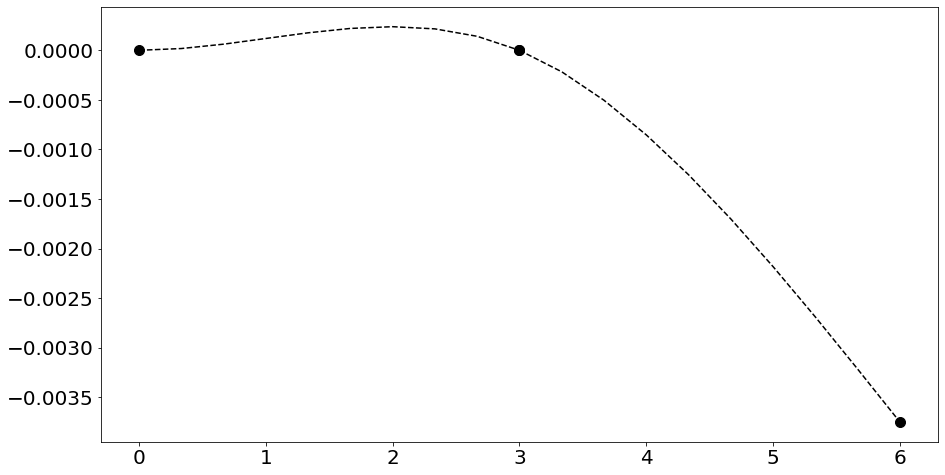

In [11]:
for e in T.MC[:-1,:]:
    X = T.MN[e,0]
    Y = T.MN[e,1]
    O = T.MN[e,-1]
    x = np.linspace(X[0], X[1], 10)
    print(x)
    d1 =  T.U[2*e[0]]
    o1 =  T.U[2*e[0]+1]
    d2 =  T.U[2*e[1]]
    o2 =  T.U[2*e[1]+1]
    L = np.abs(X[1]-X[0])
    y = mef.NT1(x-X[0],L)*d1 +  mef.NT2(x-X[0],L)*o1 + mef.NT3(x-X[0],L)*d2 + mef.NT4(x-X[0],L)*o2
    plt.plot(X, [d1, d2], 'ok', ms=10)
    plt.plot(x,y,'--k')